In [1]:
!pip install konlpy

In [2]:
#어떤 리뷰인지 모른다 . 다나와, 영화감상리뷰 등등 네이버쇼핑리뷰 데이터만 쓰지말 것 

In [1]:
%cd /Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [253]:
#!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [100]:
pwd

'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트'

In [255]:
#cd ..

In [5]:
%cd Mecab-ko-for-Google-Colab

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab


In [259]:
#!bash install_mecab-ko_on_colab190912.sh

In [260]:
#!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [261]:
#pip install tweepy==3.10.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from konlpy.tag import Mecab
#from eunjeon import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import nan


In [7]:
total_data = pd.read_table('/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/naver_shopping.txt', names = ['ratings','reviews'])
steam_data = pd.read_table('/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/steam.txt', names = ['ratings','reviews'])
map_data = pd.read_table('/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/kakao_place_review13.txt', names = ['ratings','reviews'])
total_data = pd.concat([total_data, steam_data],ignore_index=True)
total_data = pd.concat([total_data, map_data],ignore_index=True)
#total_data = pd.concat([total_data, train_data2],ignore_index=True)
print('전체 리뷰 개수  : ', len(total_data))

NameError: name 'train_data2' is not defined

In [104]:
total_data.head()

,ratings,reviews,label
0,5,배공빠르고 굿,NaN
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,NaN
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,NaN
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,NaN
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,NaN


In [105]:
train_data, val_data = train_test_split(total_data, test_size = 0.2, random_state = 11)
train_data.shape, val_data.shape

((362821, 3), (90706, 3))

In [106]:
#별점 4점 이상 : 긍정(1), 그 외: 부정(0)

def labeling(rating):
    if rating >=4:
        return 1
    else:
        return 0
#train_data = train_data.copy()
#val_data = val_data.copy()
train_data['label'] = train_data['ratings'].apply(labeling)
val_data['label'] = val_data['ratings'].apply(labeling)
total_data['label'] = total_data['ratings'].apply(labeling)

<ipython-input-106-74dfe4c58f92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'] = train_data['ratings'].apply(labeling)
<ipython-input-106-74dfe4c58f92>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['label'] = val_data['ratings'].apply(labeling)


In [107]:
train_data #!!!!!

,ratings,reviews,label
304288,5,본점,1
29972,5,박스포장으로 찌그러지지않게 잘 받았구요 쓰던 티슈가 남아있어서 아직 사용 전 입니다...,1
215350,0,언리얼 엔진이라는 훌륭한 엔진을 가지고도 정지화면만 보여주는 이 게임에 절망했다!,0
140200,5,재구매 늘잘이용하고있습니다 감사합니다^^ 번창하세요!,1
440650,0,비디오방 시절의 영화 내용은 없다 그냥 벗는거다,0
...,...,...,...
359761,0,파병다녀오신분들이라면 매우재미있게 봤을거라 생각합니다저는 년 이라크 아르빌 자이툰 ...,0
203867,1,나.는.살아있다.,0
283728,0,그냥 크게 대단히 재밌지도 않고 적당히 재밌는 턴제 RPG임. 어려운건 없는데 확률...,0
298687,1,외계인과함꼐하는재미있는레인저총놀이,0


In [108]:
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
453522,0,인간이 문제지 소는 뭔죄인가,0
453523,0,평점이 너무 낮아서,0
453524,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
453525,0,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,0


In [58]:
train_data['label'].value_counts()

0    280618
1     82203
Name: label, dtype: int64

In [59]:
val_data['label'].value_counts()

0    70171
1    20535
Name: label, dtype: int64

In [60]:
train_data.head()

,ratings,reviews,label
304288,5,본점,1
29972,5,박스포장으로 찌그러지지않게 잘 받았구요 쓰던 티슈가 남아있어서 아직 사용 전 입니다...,1
215350,0,언리얼 엔진이라는 훌륭한 엔진을 가지고도 정지화면만 보여주는 이 게임에 절망했다!,0
140200,5,재구매 늘잘이용하고있습니다 감사합니다^^ 번창하세요!,1
440650,0,비디오방 시절의 영화 내용은 없다 그냥 벗는거다,0


In [62]:
train_data

,ratings,reviews,label
304288,5,본점,1
29972,5,박스포장으로 찌그러지지않게 잘 받았구요 쓰던 티슈가 남아있어서 아직 사용 전 입니다...,1
215350,0,언리얼 엔진이라는 훌륭한 엔진을 가지고도 정지화면만 보여주는 이 게임에 절망했다!,0
140200,5,재구매 늘잘이용하고있습니다 감사합니다^^ 번창하세요!,1
440650,0,비디오방 시절의 영화 내용은 없다 그냥 벗는거다,0
...,...,...,...
359761,0,파병다녀오신분들이라면 매우재미있게 봤을거라 생각합니다저는 년 이라크 아르빌 자이툰 ...,0
203867,1,나.는.살아있다.,0
283728,0,그냥 크게 대단히 재밌지도 않고 적당히 재밌는 턴제 RPG임. 어려운건 없는데 확률...,0
298687,1,외계인과함꼐하는재미있는레인저총놀이,0


In [63]:
train_data = train_data.drop(train_data.columns[0],axis='columns')#별점 삭제

In [64]:
train_data

,reviews,label
304288,본점,1
29972,박스포장으로 찌그러지지않게 잘 받았구요 쓰던 티슈가 남아있어서 아직 사용 전 입니다...,1
215350,언리얼 엔진이라는 훌륭한 엔진을 가지고도 정지화면만 보여주는 이 게임에 절망했다!,0
140200,재구매 늘잘이용하고있습니다 감사합니다^^ 번창하세요!,1
440650,비디오방 시절의 영화 내용은 없다 그냥 벗는거다,0
...,...,...
359761,파병다녀오신분들이라면 매우재미있게 봤을거라 생각합니다저는 년 이라크 아르빌 자이툰 ...,0
203867,나.는.살아있다.,0
283728,그냥 크게 대단히 재밌지도 않고 적당히 재밌는 턴제 RPG임. 어려운건 없는데 확률...,0
298687,외계인과함꼐하는재미있는레인저총놀이,0


In [65]:
train_data.dtypes

reviews    object
label       int64
dtype: object

In [111]:
total_data

,reviews,label
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...
453522,인간이 문제지 소는 뭔죄인가,0
453523,평점이 너무 낮아서,0
453524,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
453525,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,0


In [130]:
pwd

'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트'

In [134]:
import pandas as pd
all_data = total_data.to_excel('./total_data2.xlsx',index=False)

In [112]:
%cd Mecab-ko-for-Google-Colab

[Errno 2] No such file or directory: 'Mecab-ko-for-Google-Colab'
/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab


In [113]:
pwd

'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab'

In [114]:

#형태소 분석기로 토큰화
mecab = Mecab()

#불용어 정의
stopwords = ['은','는','이','가','도','다','의','한','에','하','고','을','를','인','듯','과','와','네','들','게','임','.','!','영화','..']

In [115]:
#훈련, 검증데이터 토큰화 및 불용어 제거
train_data = train_data.copy()
#val_data = val_data.copy()

train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
val_data['tokenized'] = val_data['reviews'].apply(mecab.morphs)
val_data['tokenized'] = val_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
total_data['tokenized'] = total_data['reviews'].apply(mecab.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-115-960146e2b748>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['tokenized'] = val_data['reviews'].apply(mecab.morphs)
<ipython-input-115-960146e2b748>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['tokenized'] = val_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [70]:
train_data

,reviews,label,tokenized
304288,본점,1,[본점]
29972,박스포장으로 찌그러지지않게 잘 받았구요 쓰던 티슈가 남아있어서 아직 사용 전 입니다...,1,"[박스, 포장, 으로, 찌그러지, 지, 않, 잘, 받, 았, 구요, 쓰, 던, 티슈..."
215350,언리얼 엔진이라는 훌륭한 엔진을 가지고도 정지화면만 보여주는 이 게임에 절망했다!,0,"[언리얼, 엔진, 라는, 훌륭, 엔진, 가지, 정지, 화면, 만, 보여, 주, 게임..."
140200,재구매 늘잘이용하고있습니다 감사합니다^^ 번창하세요!,1,"[재, 구매, 늘, 잘, 이용, 있, 습니다, 감사, 합니다, ^^, 번창, 세요]"
440650,비디오방 시절의 영화 내용은 없다 그냥 벗는거다,0,"[비디오방, 시절, 내용, 없, 그냥, 벗, 거]"
...,...,...,...
359761,파병다녀오신분들이라면 매우재미있게 봤을거라 생각합니다저는 년 이라크 아르빌 자이툰 ...,0,"[파병, 다녀오, 신, 분, 라면, 매우, 재미있, 봤, 거, 라, 생각, 합니다,..."
203867,나.는.살아있다.,0,"[나, 살, 아, 있]"
283728,그냥 크게 대단히 재밌지도 않고 적당히 재밌는 턴제 RPG임. 어려운건 없는데 확률...,0,"[그냥, 크, 대단히, 재밌, 지, 않, 적당히, 재밌, 턴, 제, RPG, 어려운..."
298687,외계인과함꼐하는재미있는레인저총놀이,0,"[외계인, 함꼐, 재미, 있, 레인저, 총, 놀이]"


In [71]:
#긍정리뷰와 부정리뷰에 자주 등장하는 단어 확인
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

negative_word_count = Counter(negative_words)
negative_word_count.most_common(20)



[('네요', 47778),
 ('있', 44346),
 ('안', 41939),
 ('는데', 41462),
 ('지', 40287),
 ('게임', 36858),
 ('없', 34335),
 ('보', 33399),
 ('좋', 31742),
 ('너무', 29125),
 ('만', 27670),
 ('했', 26048),
 ('나', 25585),
 ('같', 24633),
 ('면', 24604),
 ('되', 24195),
 ('어', 23332),
 ('어요', 23214),
 ('로', 23099),
 ('거', 22932)]

In [73]:
positive_word_count = Counter(positive_words)
positive_word_count.most_common(20)

[('좋', 43007),
 ('아요', 22772),
 ('네요', 21489),
 ('어요', 21150),
 ('잘', 20057),
 ('구매', 17327),
 ('습니다', 14725),
 ('있', 13611),
 ('배송', 13096),
 ('는데', 12868),
 ('먹', 11075),
 ('했', 10931),
 ('~', 10684),
 ('합니다', 10551),
 ('재', 9991),
 ('너무', 9263),
 ('같', 8621),
 ('만족', 7762),
 ('거', 7179),
 ('어', 6920)]

In [74]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_val = val_data['tokenized'].values
y_val = val_data['label'].values

In [75]:
#단어 집합 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [76]:
#등장 횟수가 1회인 단어들은 제거
threshold = 2

total_cnt = len(tokenizer.word_index)#총 단어수
rare_cnt = 0 # 등장 횟수가 1회인 단어 카운트

for key, value in tokenizer.word_counts.items():
    
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        
print('단어 집합(vocabulary)의 크기 : ',total_cnt)



단어 집합(vocabulary)의 크기 :  84575


In [77]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 47419


In [78]:
tokenzier = Tokenizer(vocab_size, oov_token = 'OOV')
tokenzier.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [92]:
%cd ..

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [94]:
print(X_train[0])
print(X_val[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0 16410]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  76 569
   1   6  31  65   5  58 411 152]


리뷰의 최대 길이 :  91
리뷰의 평균 길이 : 14.99565901642959


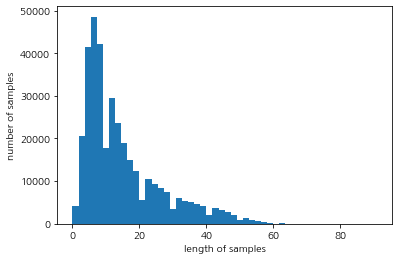

In [80]:
#패딩을 위해 최대 길이와 길이 분포 확인

print('리뷰의 최대 길이 : ', max(len(l) for l in X_train))
print('리뷰의 평균 길이 :' , sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [81]:
#최대 길이 80으로 패딩

max_len = 80
X_train = pad_sequences(X_train, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)

print(X_train.shape)
print(X_val.shape)

(362821, 80)
(90706, 80)


In [82]:
print(X_train[0])
print(X_val[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0 16410]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  76 569
   1   6  31  65   5  58 411 152]


In [83]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Activation, Bidirectional
from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [84]:
print(vocab_size)

47419


In [116]:
#모델2 Simple LSTM

model_ = Sequential()

#model_.add(Embedding(vocab_size,80))
model_.add(Embedding(362821,80))

model_.add(LSTM(64, input_shape=(80,)))
model_.add(Dropout(0.5))
model_.add(Dense(1,activation='sigmoid'))

model_.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
model_.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 80)          29025680  
                                                                 
 lstm_2 (LSTM)               (None, 64)                37120     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,062,865
Trainable params: 29,062,865
Non-trainable params: 0
_________________________________________________________________


In [117]:
X_train.shape

(362821, 80)

In [118]:
history_ = model_.fit(X_train, y_train, epochs = 5,batch_size=64,validation_split=0.2)

Epoch 1/5
4536/4536 [==============================] - 395s 87ms/step - loss: 0.1713 - accuracy: 0.9369 - val_loss: 0.1514 - val_accuracy: 0.9463
Epoch 2/5
4536/4536 [==============================] - 397s 88ms/step - loss: 0.1412 - accuracy: 0.9499 - val_loss: 0.1372 - val_accuracy: 0.9512
Epoch 3/5
4536/4536 [==============================] - 394s 87ms/step - loss: 0.1293 - accuracy: 0.9547 - val_loss: 0.1313 - val_accuracy: 0.9528
Epoch 4/5
4536/4536 [==============================] - 386s 85ms/step - loss: 0.1197 - accuracy: 0.9587 - val_loss: 0.1282 - val_accuracy: 0.9549
Epoch 5/5
4536/4536 [==============================] - 397s 88ms/step - loss: 0.1130 - accuracy: 0.9617 - val_loss: 0.1254 - val_accuracy: 0.9551


In [119]:
print("\n 테스트 정확도 : %4f"%(model_.evaluate(X_val,y_val)[1]))

2835/2835 [==============================] - 15s 5ms/step - loss: 0.1221 - accuracy: 0.9577

 테스트 정확도 : 0.957743


In [121]:
%cd ..

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [122]:
model_.save('best_model_1218.h5')#학습 모델 저장

In [123]:
from keras.models import load_model
loaded_model = load_model('./best_model_1218.h5')#저장한 모델 불러오기

In [124]:
y_pred = loaded_model.predict(X_val)
y_pred = np.round(y_pred)

In [ ]:
import pandas as pd
predictions = pd.DataFrame(y_pred,columns=['predictions']).to_csv('./prediction4.csv')

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

y_pred = model_.predict(X_val)
y_pred = np.round(y_pred)
print("Accuracy score : ", accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Accuracy score :  0.9577425969616122
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     70171
           1       0.91      0.90      0.91     20535

    accuracy                           0.96     90706
   macro avg       0.94      0.94      0.94     90706
weighted avg       0.96      0.96      0.96     90706

